In [116]:
import numpy as np
import healpy as hp

In [117]:
map030 = hp.read_map("ffp10_newdust_total_030_full_map.fits")
map044 = hp.read_map("ffp10_newdust_total_044_full_map.fits")
map070 = hp.read_map("ffp10_newdust_total_070_full_map.fits")
map100 = hp.read_map("ffp10_newdust_total_100_full_map.fits")
map143 = hp.read_map("ffp10_newdust_total_143_full_map.fits")
map217 = hp.read_map("ffp10_newdust_total_217_full_map.fits")
map353 = hp.read_map("ffp10_newdust_total_353_full_map.fits")
map545 = hp.read_map("ffp10_newdust_total_545_full_map.fits")
map857 = hp.read_map("ffp10_newdust_total_857_full_map.fits")

/opt/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/opt/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 1024
  warnings.warn("NSIDE = {0:d}".format(nside))
/opt/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = NESTED in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/opt/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))
/opt/anaconda3/envs/act_notebooks/lib/python3.9/site-packages/healpy/fitsfunc.py:486: UserWarning

In [118]:
#we need to convert units for two highest frequency maps

#map 545 : For the 545 GHz map, the unit conversion is (58.0356±0.0278) MJy Sr^−1 K^−1

hp.mollview(
    map545,
    coord=["G"],
    title="Map Galactic Sample 545 GHz",
    unit="(58.0356±0.0278)*mK",
    norm="hist",
    #min=-,
    #max=0.01,
)
hp.graticule()
plt.savefig("Map545.png")

#map 545 : For the 545 GHz map, the unit conversion is (2.2681±0.0270) MJy Sr^−1 K^−1
hp.mollview(
    map857,
    coord=["G"],
    title="Map Galactic Sample 857 GHz",
    unit="(2.2681±0.0270)*mK",
    norm="hist",
    #min=_,
    #max=_,
)
hp.graticule()
plt.savefig("Map857.png")

hp.mollview(
    map353,
    coord=["G"],
    title="Map Galactic Sample 857 GHz",
    unit="mK",
    norm="hist",
    #min=_,
    #max=_,
)
hp.graticule()

## Aim : To compute the covariance matrix of the 9 Planck Frequency maps.

In [119]:
from scipy.stats import multivariate_normal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt
def doplt(arr2d,cmap='gray',**kwargs): return(plt.imshow(arr2d,cmap=cmap,**kwargs))
from scipy.linalg import eigh

In [120]:
#helpful to downgrade the pixels of the high frequency maps to get cov matrices

In [121]:
#Downgrading
map100DG= hp.pixelfunc.ud_grade(map100,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
map100DG


array([-1.49414494e-04, -1.33527123e-04, -1.48559167e-04, ...,
       -1.00223342e-04, -1.15561006e-04, -8.98249436e-05])

In [122]:
map143DG= hp.pixelfunc.ud_grade(map143,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
map217DG= hp.pixelfunc.ud_grade(map217,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
map353DG= hp.pixelfunc.ud_grade(map353,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
map545DG= hp.pixelfunc.ud_grade(map545,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)
map857DG= hp.pixelfunc.ud_grade(map857,1024, pess=False, order_in='RING', order_out=None, power=None, dtype=None)






In [123]:
map100DG,map143DG,map217DG, map353DG, map545DG, map857DG

(array([-1.49414494e-04, -1.33527123e-04, -1.48559167e-04, ...,
        -1.00223342e-04, -1.15561006e-04, -8.98249436e-05]),
 array([-1.33060596e-04, -9.55471442e-05, -1.16973673e-04, ...,
        -1.19754002e-04, -8.92591743e-05, -1.04540110e-04]),
 array([-1.19590921e-04, -6.44739848e-05, -1.18919550e-04, ...,
        -1.09758897e-04, -1.02937174e-04, -3.47443493e-05]),
 array([-3.87549517e-06,  7.61673437e-06,  7.98665860e-05, ...,
        -5.54904691e-05,  4.07652697e-05, -7.96044769e-05]),
 array([0.67745952, 0.7349039 , 0.78084832, ..., 0.3536963 , 0.33187467,
        0.29854675]),
 array([1.11339706, 1.17089167, 1.29976702, ..., 0.98588133, 1.01991385,
        0.98079562]))

Now we can get the covariance matrix between the 9 frequency maps (output expected to be a 9x9 matrix)

In [124]:
NPIX = 12582912
d=9
samples=np.zeros((NPIX,9))
samples[:,0] = map030
samples[:,1] = map044
samples[:,2] = map070
samples[:,3] = map100DG
samples[:,4] = map143DG
samples[:,5] = map217DG
samples[:,6] = map353DG
samples[:,7] = map545DG
samples[:,8] = map857DG
cov = np.zeros((d,d))
for idx_r in range(d):
  for idx_c in range(d):
    if idx_c >= idx_r:
      x = samples[:,idx_r]
      y = samples[:,idx_c]
      Ex = x.mean()
      Ey = y.mean()
      print(Ex,Ey)
    
      cov_xy = ((x-Ex)*(y-Ey)).mean()
      cov[idx_r,idx_c] = cov_xy
      if idx_c != idx_r: cov[idx_c,idx_r] = cov_xy
cov

0.00032782734298932487 0.00032782734298932487
0.00032782734298932487 7.257375365699384e-05
0.00032782734298932487 8.272340209032093e-06
0.00032782734298932487 8.958460679183274e-05
0.00032782734298932487 0.00013159754178074953
0.00032782734298932487 0.00046467541707846406
0.00032782734298932487 0.0034295136653037287
0.00032782734298932487 3.868546681564535
0.00032782734298932487 10.834334136272345
7.257375365699384e-05 7.257375365699384e-05
7.257375365699384e-05 8.272340209032093e-06
7.257375365699384e-05 8.958460679183274e-05
7.257375365699384e-05 0.00013159754178074953
7.257375365699384e-05 0.00046467541707846406
7.257375365699384e-05 0.0034295136653037287
7.257375365699384e-05 3.868546681564535
7.257375365699384e-05 10.834334136272345
8.272340209032093e-06 8.272340209032093e-06
8.272340209032093e-06 8.958460679183274e-05
8.272340209032093e-06 0.00013159754178074953
8.272340209032093e-06 0.00046467541707846406
8.272340209032093e-06 0.0034295136653037287
8.272340209032093e-06 3.868546

array([[4.00345163e-06, 1.42929215e-06, 6.30653092e-07, 5.79347448e-07,
        6.28350425e-07, 2.37375601e-06, 1.78155132e-05, 1.87068949e-02,
        5.97321912e-02],
       [1.42929215e-06, 5.28864867e-07, 2.42044177e-07, 2.09431357e-07,
        2.24973772e-07, 8.28775883e-07, 6.16636590e-06, 6.47039207e-03,
        2.07032668e-02],
       [6.30653092e-07, 2.42044177e-07, 1.38433640e-07, 9.91659281e-08,
        1.06501677e-07, 3.76690233e-07, 2.75618916e-06, 2.88170556e-03,
        9.22038346e-03],
       [5.79347448e-07, 2.09431357e-07, 9.91659281e-08, 1.35433732e-07,
        1.40847664e-07, 5.37226362e-07, 3.93664276e-06, 4.11687715e-03,
        1.31839541e-02],
       [6.28350425e-07, 2.24973772e-07, 1.06501677e-07, 1.40847664e-07,
        1.56947261e-07, 5.83992284e-07, 4.32615229e-06, 4.49879368e-03,
        1.41995698e-02],
       [2.37375601e-06, 8.28775883e-07, 3.76690233e-07, 5.37226362e-07,
        5.83992284e-07, 2.35097068e-06, 1.75977640e-05, 1.83958836e-02,
        5.8

In [125]:
cov

array([[4.00345163e-06, 1.42929215e-06, 6.30653092e-07, 5.79347448e-07,
        6.28350425e-07, 2.37375601e-06, 1.78155132e-05, 1.87068949e-02,
        5.97321912e-02],
       [1.42929215e-06, 5.28864867e-07, 2.42044177e-07, 2.09431357e-07,
        2.24973772e-07, 8.28775883e-07, 6.16636590e-06, 6.47039207e-03,
        2.07032668e-02],
       [6.30653092e-07, 2.42044177e-07, 1.38433640e-07, 9.91659281e-08,
        1.06501677e-07, 3.76690233e-07, 2.75618916e-06, 2.88170556e-03,
        9.22038346e-03],
       [5.79347448e-07, 2.09431357e-07, 9.91659281e-08, 1.35433732e-07,
        1.40847664e-07, 5.37226362e-07, 3.93664276e-06, 4.11687715e-03,
        1.31839541e-02],
       [6.28350425e-07, 2.24973772e-07, 1.06501677e-07, 1.40847664e-07,
        1.56947261e-07, 5.83992284e-07, 4.32615229e-06, 4.49879368e-03,
        1.41995698e-02],
       [2.37375601e-06, 8.28775883e-07, 3.76690233e-07, 5.37226362e-07,
        5.83992284e-07, 2.35097068e-06, 1.75977640e-05, 1.83958836e-02,
        5.8

Great, now we can visualise the covariance

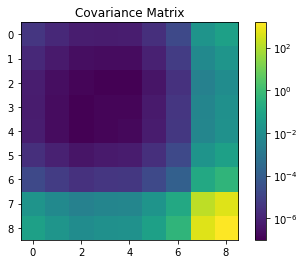

In [126]:
import matplotlib
plt.imshow(cov,cmap='viridis',norm=matplotlib.colors.LogNorm())
plt.colorbar()
matplotlib.pyplot.title('Covariance Matrix', fontdict=None)
plt.savefig("covMAT.png")

In [127]:
df = pd.DataFrame(cov)

In [128]:
df

,0,1,2,3,4,5,6,7,8
0,4.003452e-06,1.429292e-06,6.306531e-07,5.793474e-07,6.283504e-07,2.373756e-06,0.000018,0.018707,0.059732
1,1.429292e-06,5.288649e-07,2.420442e-07,2.094314e-07,2.249738e-07,8.287759e-07,0.000006,0.006470,0.020703
2,6.306531e-07,2.420442e-07,1.384336e-07,9.916593e-08,1.065017e-07,3.766902e-07,0.000003,0.002882,0.009220
3,5.793474e-07,2.094314e-07,9.916593e-08,1.354337e-07,1.408477e-07,5.372264e-07,0.000004,0.004117,0.013184
4,6.283504e-07,2.249738e-07,1.065017e-07,1.408477e-07,1.569473e-07,5.839923e-07,0.000004,0.004499,0.014200
5,2.373756e-06,8.287759e-07,3.766902e-07,5.372264e-07,5.839923e-07,2.350971e-06,0.000018,0.018396,0.058499
6,1.781551e-05,6.166366e-06,2.756189e-06,3.936643e-06,4.326152e-06,1.759776e-05,0.000133,0.139050,0.442172
7,1.870689e-02,6.470392e-03,2.881706e-03,4.116877e-03,4.498794e-03,1.839588e-02,0.139050,146.358237,467.709871
8,5.973219e-02,2.070327e-02,9.220383e-03,1.318395e-02,1.419957e-02,5.849908e-02,0.442172,467.709871,1505.200363


In [129]:
#inverting covariance matrix cov,

cov_inv = np.linalg.inv(cov) 
cov_inv

array([[ 1.09450552e+07, -3.11699193e+07,  6.82249336e+06,
         1.59446360e+05,  4.96188105e+06,  3.79137180e+06,
        -2.53970195e+05, -1.35791598e+03,  2.53587376e+02],
       [-3.11699193e+07,  1.02305959e+08, -3.73606805e+07,
        -2.02736837e+07, -1.13656622e+07,  7.90859496e+06,
        -1.96241829e+06,  4.16910396e+03, -6.82909164e+02],
       [ 6.82249336e+06, -3.73606805e+07,  4.49215928e+07,
         1.49534618e+07, -1.65690036e+07, -1.19510762e+07,
         1.42275210e+06,  1.00868618e+03, -2.73617144e+02],
       [ 1.59446360e+05, -2.02736837e+07,  1.49534618e+07,
         4.39041343e+08, -2.10191251e+08, -2.38099559e+08,
         2.19319101e+07,  2.48757923e+04, -6.60049937e+03],
       [ 4.96188105e+06, -1.13656622e+07, -1.65690036e+07,
        -2.10191251e+08,  2.62488629e+08,  1.05374274e+07,
         1.17031699e+07, -3.90960751e+04,  7.72654268e+03],
       [ 3.79137180e+06,  7.90859496e+06, -1.19510762e+07,
        -2.38099559e+08,  1.05374274e+07,  2.910766


## Getting weighting matrix

$ w_l = \frac{C^{-1}*e}{e^{T}*C^{-1}*e} $



In [130]:
e = (1,1,1,1,1,1,1,1,1)

In [131]:
e

(1, 1, 1, 1, 1, 1, 1, 1, 1)

In [132]:
type(e)

tuple

In [133]:
e = np.array(e)

In [134]:
e

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [135]:
type(e)

numpy.ndarray

In [136]:
e_T = e.T
e_T

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [137]:
np.shape(e_T)

(9,)

In [138]:
#denominator
denom = np.sum(cov_inv) 
denom


70483759.76812027

In [139]:
numerator = np.dot(cov_inv,e)
numerator


array([-4.74474600e+06,  8.08567579e+06,  2.24027472e+06,  7.53994277e+06,
        5.15338213e+07,  9.34861289e+06, -3.51968176e+06, -4.66693034e+02,
        3.26794896e+02])

In [140]:
np.shape(numerator)

(9,)

In [141]:
inter = np.dot(e.T,cov_inv)
inter  #intermediate factor for denominator

array([-4.74474600e+06,  8.08567579e+06,  2.24027472e+06,  7.53994277e+06,
        5.15338213e+07,  9.34861289e+06, -3.51968176e+06, -4.66693034e+02,
        3.26794896e+02])

In [142]:
denominator = np.dot(inter,e)
denominator

70483759.76812035

In [143]:
pd.DataFrame(numerator)

,0
0,-4.744746e+06
1,8.085676e+06
2,2.240275e+06
3,7.539943e+06
4,5.153382e+07
5,9.348613e+06
6,-3.519682e+06
7,-4.666930e+02
8,3.267949e+02


In [144]:
w_l = numerator/denominator

In [145]:
w_l

array([-6.73168687e-02,  1.14716863e-01,  3.17842682e-02,  1.06974185e-01,
        7.31144613e-01,  1.32634992e-01, -4.99360672e-02, -6.62128461e-06,
        4.63645664e-06])

## Getting Clean CMB map

In [146]:
pd.DataFrame(w_l)

,0
0,-0.067317
1,0.114717
2,0.031784
3,0.106974
4,0.731145
5,0.132635
6,-0.049936
7,-0.000007
8,0.000005


In [147]:
w_l[0],w_l[1],w_l[2],w_l[3],w_l[4],w_l[5],w_l[6],w_l[7],w_l[8]

(-0.0673168686966119,
 0.11471686266261191,
 0.03178426817548077,
 0.10697418522159187,
 0.7311446129333488,
 0.1326349917256285,
 -0.04993606719408377,
 -6.621284609844757e-06,
 4.636456642824572e-06)

In [148]:
weighted_sum = w_l[0]*map030 + w_l[1]*map044 + w_l[2]*map070 + w_l[3]*map100DG + w_l[4]*map143DG + w_l[5]*map217DG + w_l[6]*map353DG + w_l[7]*map545DG + w_l[8]*map857DG

In [149]:
weighted_sum

array([-1.52791119e-04, -1.16631794e-04, -1.44521269e-04, ...,
       -1.22548708e-04, -9.87416437e-05, -1.12162062e-04])

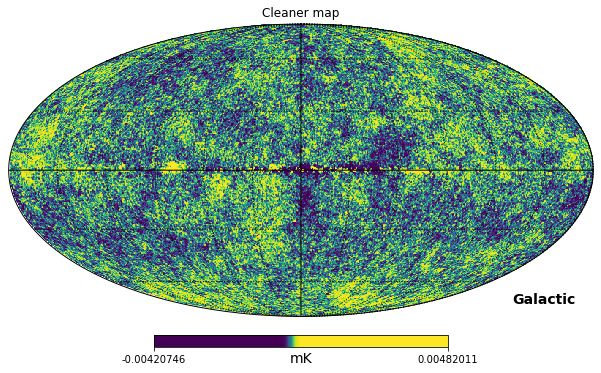

In [161]:
hp.mollview(
    weighted_sum,
    coord=["G"],
    title="Cleaner map",
    unit="mK",
    norm="hist",
    
)
hp.graticule()
plt.savefig("Possible Cleaner Map")

The Difference Map below confirms that the junk(noise and foreground contaminants) were removed successfully. This can nbe seen from the large blue region along equator which initially had forerounds.

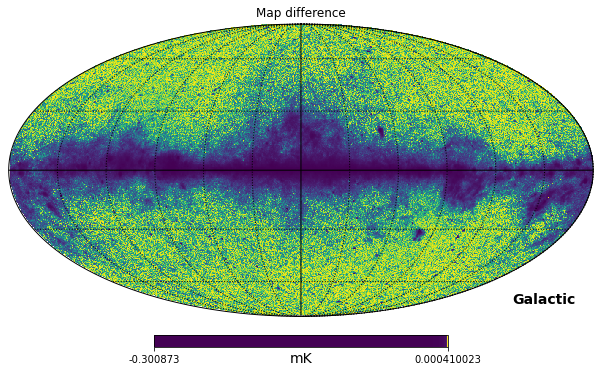

In [162]:




hp.mollview(
    weighted_sum-map030,
    coord=["G"],
    title="Map difference",
    unit="mK",
    norm="hist",
    
)
hp.graticule()
plt.savefig("Difference")